In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics

import math
from sklearn.metrics import r2_score


In [ ]:
dataset = pd.read_csv('froude_calculated_With_deposited_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,c(kg),Dgr,d/R,i,Fr
0,0.073,13.242335,0.011277,0.018,5.477197
1,0.019,13.242335,0.011277,0.013,4.388356
2,0.460,13.242335,0.012326,0.023,8.501753
3,0.090,13.242335,0.011778,0.022,7.049966
4,0.151,13.242335,0.008154,0.019,9.524603


In [ ]:
dataset.describe()

,c(kg),Dgr,d/R,i,Fr
count,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.223205,80.150635,0.056572,0.030078,4.022855
std,0.209265,68.433901,0.052363,0.012489,2.272003
min,0.007000,11.865029,0.004796,0.007300,1.262905
25%,0.078000,18.391129,0.010834,0.021000,2.215267
50%,0.148000,49.971077,0.040816,0.028600,3.318484
75%,0.296500,139.033427,0.088384,0.035000,4.989288
max,1.044000,210.754851,0.233333,0.090400,13.075404


In [ ]:
dataset.columns

Index(['c(kg)', 'Dgr', 'd/R', 'i', 'Fr'], dtype='object')

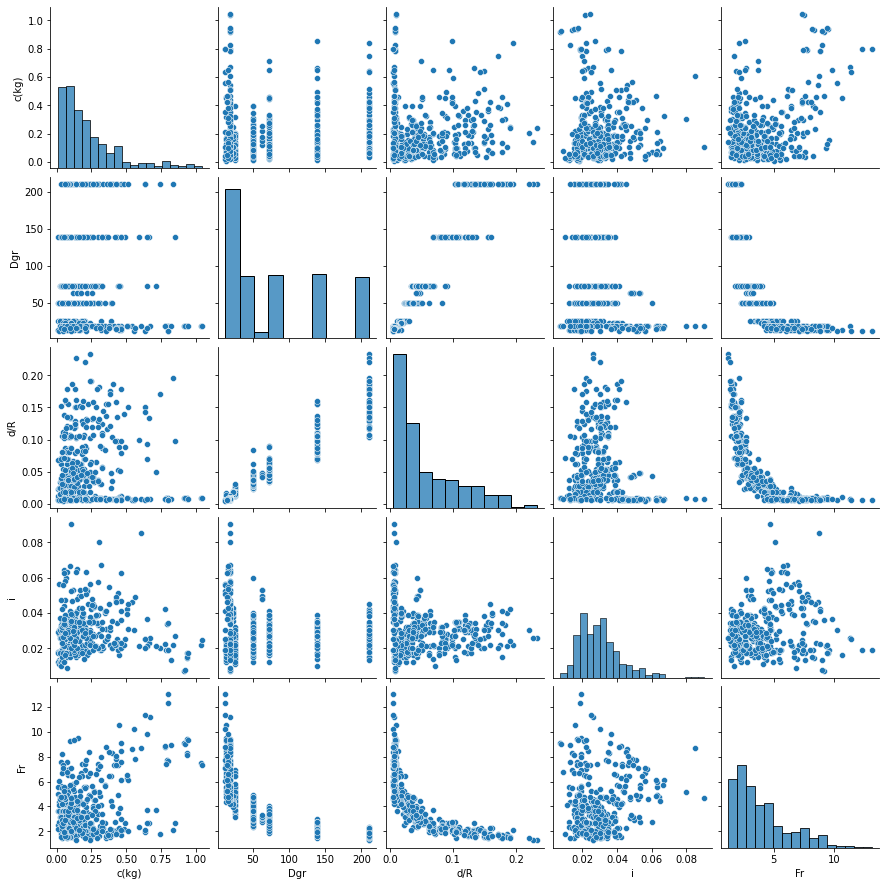

In [ ]:
sns.pairplot(dataset)

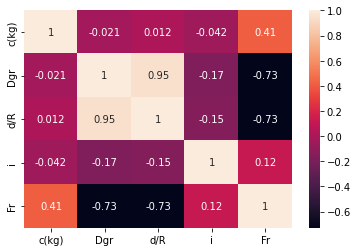

In [ ]:
sns.heatmap(dataset.corr(), annot=True)

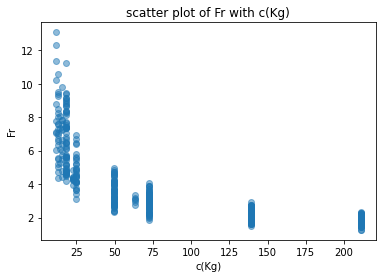

In [ ]:
plt.scatter(dataset['Dgr'],dataset['Fr'],alpha=0.5)
plt.title('scatter plot of Fr with c(Kg)')
plt.xlabel('c(Kg)')
plt.ylabel('Fr')
plt.show()

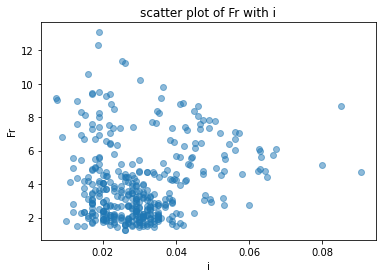

In [ ]:
plt.scatter(dataset['i'],dataset['Fr'],alpha=0.5)
plt.title('scatter plot of Fr with i')
plt.xlabel('i')
plt.ylabel('Fr')
plt.show()

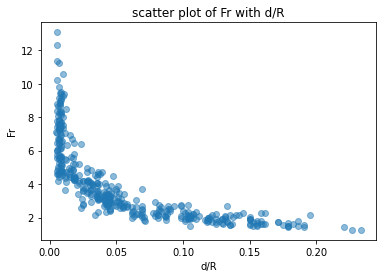

In [ ]:
plt.scatter(dataset['d/R'],dataset['Fr'],alpha=0.5)
plt.title('scatter plot of Fr with d/R')
plt.xlabel('d/R')
plt.ylabel('Fr')
plt.show()

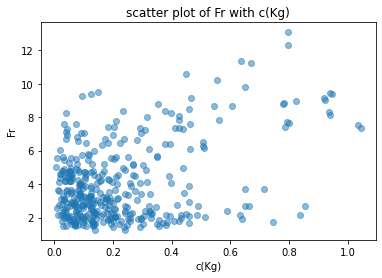

In [ ]:
plt.scatter(dataset['c(kg)'],dataset['Fr'],alpha=0.5)
plt.title('scatter plot of Fr with c(Kg)')
plt.xlabel('c(Kg)')
plt.ylabel('Fr')
plt.show()

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

In [ ]:
print(y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [ ]:
print(X_train)

In [ ]:
print(X_test)

Evaluation of linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred_linear = regressor.predict(X_test)
print(np.concatenate((y_pred_linear.reshape(len(y_pred_linear),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
r2_score(y_test, y_pred_linear)

In [ ]:
print("Model slope:    ", regressor.coef_[0])
print("Model intercept:", regressor.intercept_)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))

In [ ]:
plt.scatter(y_pred_linear,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
sns.distplot((y_pred_linear),bins=50)

Gradient Boosting Regressor

In [ ]:
from sklearn import ensemble
reg_grad= ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
reg_grad.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [ ]:
y_pred_GB = reg_grad.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_GB.reshape(len(y_pred_GB),1), y_test.reshape(len(y_test),1)),1))

[[3.97012717 3.14228028]
 [2.53243987 2.49363017]
 [6.06407384 4.75130321]
 [1.34634564 1.49352266]
 [4.68692151 4.7773898 ]
 [4.83441711 4.79036455]
 [5.67972802 5.56149608]
 [1.79555077 1.67197665]
 [5.14109812 4.63192837]
 [2.60696815 2.65536838]
 [8.26724816 9.00581672]
 [7.85783082 9.52460319]
 [2.84521031 2.59197995]
 [7.75372824 7.99582739]
 [6.52713861 8.2377919 ]
 [1.96328708 1.93279402]
 [6.33375752 7.43718076]
 [1.84680354 2.12129361]
 [4.39402435 4.39746202]
 [2.94196671 3.13677147]
 [7.60980314 7.4230884 ]
 [1.84486982 1.7406128 ]
 [3.75266925 3.17787053]
 [2.72719675 4.20103057]
 [5.50736377 4.44151703]
 [2.82507888 3.12162504]
 [3.34138376 3.11217441]
 [2.1508456  1.79277628]
 [2.55974513 2.38926536]
 [6.99458907 6.92898385]
 [2.7215442  2.53462135]
 [5.14507677 6.03745556]
 [8.19777081 7.33978691]
 [2.08717331 2.20733863]
 [5.1278953  5.23817607]
 [4.26298964 4.72191306]
 [7.16300604 7.38126211]
 [4.04350319 3.2045597 ]
 [7.27907445 6.42001097]
 [7.49988984 7.61114509]


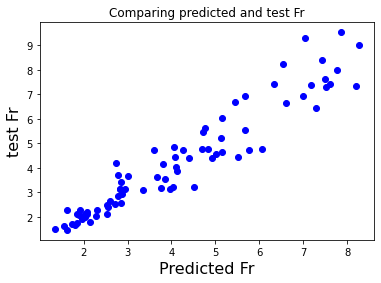

In [ ]:
plt.scatter(y_pred_GB,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
r2_score(y_test, y_pred_GB)

0.8981085342187137

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_GB))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_GB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GB)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GB)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GB)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GB)))

MAE: 0.48252177758447534
MSE: 0.4663671406375111
RMSE: 0.6829107852695776
R2: 0.6829107852695776
BIAS: 0.6829107852695776
IQRREST: 0.6829107852695776


Cat Boost Regressor

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
# from catboost import Pool
from catboost import CatBoostRegressor
# train_data = Pool(data=X_train,
#                   label=y_train
#                  )

# test_data = Pool(data=X_test,
#                   label=y_test,
                  
#                  )

In [ ]:
#build model
reg_catm= CatBoostRegressor(loss_function='RMSE')
# Fit model 
reg_catm.fit( X_train, y_train,
               eval_set=(X_test, y_test),
               plot=True
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.042347
0:	learn: 2.2248866	test: 2.1062905	best: 2.1062905 (0)	total: 47.2ms	remaining: 47.1s
1:	learn: 2.1588175	test: 2.0550473	best: 2.0550473 (1)	total: 48.3ms	remaining: 24.1s
2:	learn: 2.0958976	test: 1.9943098	best: 1.9943098 (2)	total: 49.4ms	remaining: 16.4s
3:	learn: 2.0412080	test: 1.9501523	best: 1.9501523 (3)	total: 50.5ms	remaining: 12.6s
4:	learn: 1.9772787	test: 1.8963092	best: 1.8963092 (4)	total: 51.5ms	remaining: 10.3s
5:	learn: 1.9186264	test: 1.8454275	best: 1.8454275 (5)	total: 52.7ms	remaining: 8.72s
6:	learn: 1.8603524	test: 1.7937884	best: 1.7937884 (6)	total: 53.7ms	remaining: 7.62s
7:	learn: 1.8063145	test: 1.7473514	best: 1.7473514 (7)	total: 54.8ms	remaining: 6.8s
8:	learn: 1.7549889	test: 1.7053601	best: 1.7053601 (8)	total: 55.9ms	remaining: 6.16s
9:	learn: 1.7130148	test: 1.6765806	best: 1.6765806 (9)	total: 57ms	remaining: 5.64s
10:	learn: 1.6740402	test: 1.6422407	best: 1.6422407 (10)	total: 58.1ms	remaining: 5.22s
11:	learn: 1.6

In [ ]:
y_pred_catm = reg_catm.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_catm.reshape(len(y_pred_catm),1), y_test.reshape(len(y_test),1)),1))

[[4.01434191 3.14228028]
 [2.23667141 2.49363017]
 [5.64711413 4.75130321]
 [1.34505447 1.49352266]
 [4.48763936 4.7773898 ]
 [4.6473938  4.79036455]
 [5.67125001 5.56149608]
 [2.06154864 1.67197665]
 [5.20560624 4.63192837]
 [2.70493847 2.65536838]
 [8.30976026 9.00581672]
 [7.8070612  9.52460319]
 [2.90881013 2.59197995]
 [8.56774708 7.99582739]
 [6.22915759 8.2377919 ]
 [2.22011564 1.93279402]
 [6.7178296  7.43718076]
 [1.85890005 2.12129361]
 [4.55443393 4.39746202]
 [2.83521791 3.13677147]
 [7.92328277 7.4230884 ]
 [1.80849655 1.7406128 ]
 [3.57525533 3.17787053]
 [3.25686376 4.20103057]
 [5.6030239  4.44151703]
 [3.11280014 3.12162504]
 [2.99904635 3.11217441]
 [1.99395761 1.79277628]
 [2.90892331 2.38926536]
 [6.12712042 6.92898385]
 [2.34923073 2.53462135]
 [5.87871044 6.03745556]
 [8.0529593  7.33978691]
 [2.03558218 2.20733863]
 [6.38880423 5.23817607]
 [3.98382243 4.72191306]
 [7.13366834 7.38126211]
 [3.8143322  3.2045597 ]
 [6.91300012 6.42001097]
 [7.77369799 7.61114509]


In [ ]:
r2_score(y_test, y_pred_catm)

0.9022359435015961

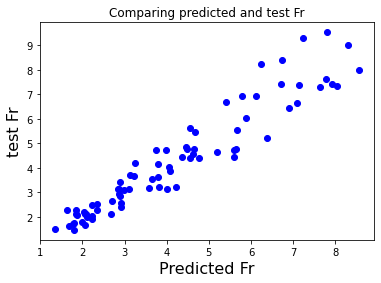

In [ ]:
plt.scatter(y_pred_catm,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_catm))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_catm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_catm)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_catm)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_catm)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_catm)))

MAE: 0.48812540174733715
MSE: 0.4474755872503961
RMSE: 0.668936160818352
R2: 0.668936160818352
BIAS: 0.668936160818352
IQRREST: 0.668936160818352


XG Boost Regressor

In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

y_preds_XGB = xg_reg.predict(X_test)

[07:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(np.concatenate((y_preds_XGB.reshape(len(y_preds_XGB),1), y_test.reshape(len(y_test),1)),1))

[[2.47309685 3.14228028]
 [1.840608   2.49363017]
 [3.12840629 4.75130321]
 [1.57928681 1.49352266]
 [2.89841008 4.7773898 ]
 [3.90011764 4.79036455]
 [3.13675451 5.56149608]
 [2.29918909 1.67197665]
 [4.00410843 4.63192837]
 [2.06987333 2.65536838]
 [4.76117611 9.00581672]
 [3.90363169 9.52460319]
 [2.17729831 2.59197995]
 [3.65288806 7.99582739]
 [3.76267242 8.2377919 ]
 [2.7309885  1.93279402]
 [4.00410843 7.43718076]
 [1.8153621  2.12129361]
 [2.79080653 4.39746202]
 [2.42947936 3.13677147]
 [4.76117611 7.4230884 ]
 [1.74426901 1.7406128 ]
 [2.42712235 3.17787053]
 [2.53877187 4.20103057]
 [4.00410843 4.44151703]
 [2.34353995 3.12162504]
 [2.66725779 3.11217441]
 [2.28489351 1.79277628]
 [1.97327209 2.38926536]
 [3.90363169 6.92898385]
 [1.87192512 2.53462135]
 [4.15245342 6.03745556]
 [4.13299465 7.33978691]
 [1.78996444 2.20733863]
 [4.09505272 5.23817607]
 [2.47309685 4.72191306]
 [3.78704023 7.38126211]
 [2.5696981  3.2045597 ]
 [3.5229125  6.42001097]
 [4.47182989 7.61114509]


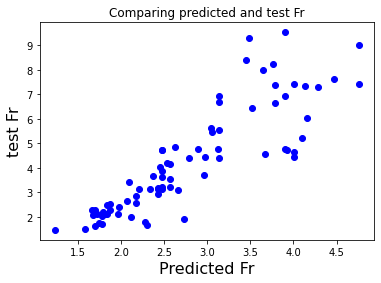

In [ ]:
plt.scatter(y_preds_XGB,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_preds_XGB))
print('MSE:', metrics.mean_squared_error(y_test, y_preds_XGB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_XGB)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_XGB)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_XGB)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_XGB)))

MAE: 1.5500517062799144
MSE: 4.35018393557344
RMSE: 2.0857094561739515
R2: 2.0857094561739515
BIAS: 2.0857094561739515
IQRREST: 2.0857094561739515


In [ ]:
r2_score(y_test, y_preds_XGB)

0.04957579771191312

LIGHT GBM

In [ ]:
import lightgbm as ltb

In [ ]:
reg_lightgbm = ltb.LGBMRegressor()
reg_lightgbm.fit(X_train, y_train)
print(); print(reg_lightgbm)

expected_y  = y_test
y_pred_lightgbm = reg_lightgbm.predict(X_test)


LGBMRegressor()


In [ ]:
print(np.concatenate((y_pred_lightgbm.reshape(len(y_pred_lightgbm),1), y_test.reshape(len(y_test),1)),1))

[[4.13170281 3.14228028]
 [2.48940307 2.49363017]
 [6.29917702 4.75130321]
 [1.46243989 1.49352266]
 [4.27296445 4.7773898 ]
 [4.41873096 4.79036455]
 [5.57558462 5.56149608]
 [1.77585109 1.67197665]
 [5.1436364  4.63192837]
 [2.56544029 2.65536838]
 [8.0996972  9.00581672]
 [7.57254693 9.52460319]
 [3.1063743  2.59197995]
 [7.64335455 7.99582739]
 [6.89142216 8.2377919 ]
 [2.50141841 1.93279402]
 [6.48125928 7.43718076]
 [1.90896288 2.12129361]
 [4.24823351 4.39746202]
 [2.89455312 3.13677147]
 [8.06046406 7.4230884 ]
 [1.90407599 1.7406128 ]
 [3.93529951 3.17787053]
 [2.64796239 4.20103057]
 [5.69475826 4.44151703]
 [2.90055383 3.12162504]
 [3.64407904 3.11217441]
 [1.87676379 1.79277628]
 [2.63328024 2.38926536]
 [6.58939204 6.92898385]
 [2.42234225 2.53462135]
 [6.16049303 6.03745556]
 [7.78431033 7.33978691]
 [2.06265034 2.20733863]
 [6.14532832 5.23817607]
 [4.04639199 4.72191306]
 [7.16461946 7.38126211]
 [4.09093172 3.2045597 ]
 [7.58460345 6.42001097]
 [7.69488812 7.61114509]


In [ ]:
r2_score(y_test, y_pred_lightgbm)

0.884218543561681

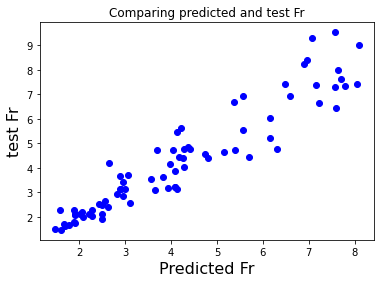

In [ ]:
plt.scatter(y_pred_lightgbm,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lightgbm))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lightgbm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lightgbm)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lightgbm)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lightgbm)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lightgbm)))

MAE: 0.5282154183116997
MSE: 0.5299429776963972
RMSE: 0.7279718247957109
R2: 0.7279718247957109
BIAS: 0.7279718247957109
IQRREST: 0.7279718247957109


Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
y_pred_rr= rr.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_rr.reshape(len(y_pred_rr),1), y_test.reshape(len(y_test),1)),1))

[[ 4.15046693  3.14228028]
 [ 2.65222783  2.49363017]
 [ 4.55369252  4.75130321]
 [-0.05970751  1.49352266]
 [ 4.36279539  4.7773898 ]
 [ 4.97876622  4.79036455]
 [ 5.01506039  5.56149608]
 [ 1.60897212  1.67197665]
 [ 4.9710993   4.63192837]
 [ 4.24388536  2.65536838]
 [ 8.59389298  9.00581672]
 [ 5.09632468  9.52460319]
 [ 3.65647037  2.59197995]
 [ 5.85533351  7.99582739]
 [ 4.56484142  8.2377919 ]
 [ 2.84638727  1.93279402]
 [ 5.44977868  7.43718076]
 [ 1.51631592  2.12129361]
 [ 4.30549013  4.39746202]
 [ 4.30454142  3.13677147]
 [ 8.05014254  7.4230884 ]
 [ 0.85458258  1.7406128 ]
 [ 3.8612702   3.17787053]
 [ 3.90015663  4.20103057]
 [ 5.4711801   4.44151703]
 [ 3.43722274  3.12162504]
 [ 4.0535227   3.11217441]
 [ 1.67806221  1.79277628]
 [ 4.19788252  2.38926536]
 [ 4.54343369  6.92898385]
 [ 2.88317083  2.53462135]
 [ 4.85164733  6.03745556]
 [ 6.32530118  7.33978691]
 [ 1.72533187  2.20733863]
 [ 4.79135037  5.23817607]
 [ 4.24919907  4.72191306]
 [ 5.91671014  7.38126211]
 

In [ ]:
r2_score(y_test, y_pred_rr)

0.6301911402054894

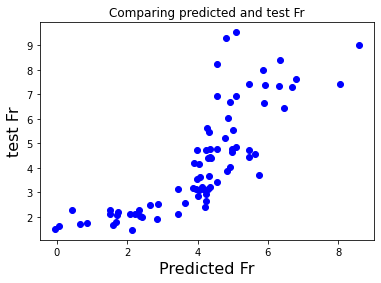

In [ ]:
plt.scatter(y_pred_rr,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)))

MAE: 0.9665361294389965
MSE: 1.6926510891009274
RMSE: 1.3010192500885325
R2: 1.3010192500885325
BIAS: 1.3010192500885325
IQRREST: 1.3010192500885325


Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
y_pred_lasso= model_lasso.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_lasso.reshape(len(y_pred_lasso),1), y_test.reshape(len(y_test),1)),1))

[[ 4.15346508  3.14228028]
 [ 2.65643206  2.49363017]
 [ 4.56151794  4.75130321]
 [-0.03424597  1.49352266]
 [ 4.36539569  4.7773898 ]
 [ 4.95393442  4.79036455]
 [ 5.01827003  5.56149608]
 [ 1.60956185  1.67197665]
 [ 4.9504105   4.63192837]
 [ 4.24812632  2.65536838]
 [ 8.56984317  9.00581672]
 [ 5.10010473  9.52460319]
 [ 3.66039877  2.59197995]
 [ 5.85159406  7.99582739]
 [ 4.57387675  8.2377919 ]
 [ 2.84850692  1.93279402]
 [ 5.43434625  7.43718076]
 [ 1.53284096  2.12129361]
 [ 4.31055608  4.39746202]
 [ 4.29075197  3.13677147]
 [ 8.0241954   7.4230884 ]
 [ 0.87023934  1.7406128 ]
 [ 3.86268028  3.17787053]
 [ 3.91152271  4.20103057]
 [ 5.44153775  4.44151703]
 [ 3.44600263  3.12162504]
 [ 4.06746994  3.11217441]
 [ 1.69037538  1.79277628]
 [ 4.19954085  2.38926536]
 [ 4.55589826  6.92898385]
 [ 2.88579156  2.53462135]
 [ 4.8341407   6.03745556]
 [ 6.3139079   7.33978691]
 [ 1.73053798  2.20733863]
 [ 4.78680179  5.23817607]
 [ 4.24871705  4.72191306]
 [ 5.89902826  7.38126211]
 

In [ ]:
r2_score(y_test, y_pred_lasso)

0.631419623903601

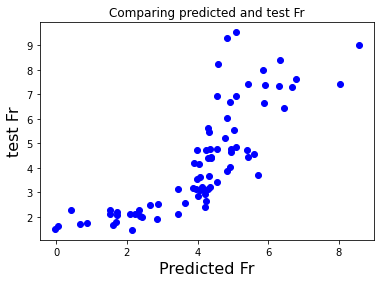

In [ ]:
plt.scatter(y_pred_lasso,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

MAE: 0.9635084687386887
MSE: 1.6870281998313015
RMSE: 1.298856497012392
R2: 1.298856497012392
BIAS: 1.298856497012392
IQRREST: 1.298856497012392


Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
y_pred_enet= model_enet.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_enet.reshape(len(y_pred_enet),1), y_test.reshape(len(y_test),1)),1))

[[ 4.15436861  3.14228028]
 [ 2.65281603  2.49363017]
 [ 4.56182668  4.75130321]
 [-0.02715297  1.49352266]
 [ 4.36660489  4.7773898 ]
 [ 4.96587125  4.79036455]
 [ 5.01628826  5.56149608]
 [ 1.62009787  1.67197665]
 [ 4.95978054  4.63192837]
 [ 4.26399931  2.65536838]
 [ 8.56080318  9.00581672]
 [ 5.09809857  9.52460319]
 [ 3.66150675  2.59197995]
 [ 5.84969573  7.99582739]
 [ 4.57220093  8.2377919 ]
 [ 2.84136312  1.93279402]
 [ 5.43777488  7.43718076]
 [ 1.53721585  2.12129361]
 [ 4.31208847  4.39746202]
 [ 4.29780081  3.13677147]
 [ 8.01925599  7.4230884 ]
 [ 0.85647154  1.7406128 ]
 [ 3.85796653  3.17787053]
 [ 3.90559875  4.20103057]
 [ 5.45367044  4.44151703]
 [ 3.44155787  3.12162504]
 [ 4.0677217   3.11217441]
 [ 1.68748456  1.79277628]
 [ 4.20985376  2.38926536]
 [ 4.55261016  6.92898385]
 [ 2.87944146  2.53462135]
 [ 4.84415448  6.03745556]
 [ 6.31097129  7.33978691]
 [ 1.71360624  2.20733863]
 [ 4.78988161  5.23817607]
 [ 4.24804965  4.72191306]
 [ 5.90150317  7.38126211]
 

In [ ]:
r2_score(y_test, y_pred_enet)

0.630589380678118

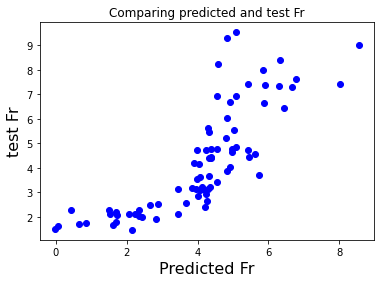

In [ ]:
plt.scatter(y_pred_enet,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_enet))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_enet))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_enet)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_enet)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_enet)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_enet)))

MAE: 0.9654160909344716
MSE: 1.6908283037569167
RMSE: 1.3003185393421555
R2: 1.3003185393421555
BIAS: 1.3003185393421555
IQRREST: 1.3003185393421555


Decision Tree Regressor

In [ ]:

from sklearn.tree import DecisionTreeRegressor 
reg_decisiontree = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred_decisiontree = reg_decisiontree.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_decisiontree.reshape(len(y_pred_decisiontree),1), y_test.reshape(len(y_test),1)),1))

[[3.60088334 3.14228028]
 [2.14862106 2.49363017]
 [7.0499661  4.75130321]
 [1.47979543 1.49352266]
 [4.42428939 4.7773898 ]
 [4.8037193  4.79036455]
 [6.47493948 5.56149608]
 [1.71590379 1.67197665]
 [4.8037193  4.63192837]
 [2.23107135 2.65536838]
 [7.53037852 9.00581672]
 [7.5668903  9.52460319]
 [2.77009068 2.59197995]
 [6.55503869 7.99582739]
 [7.31392739 8.2377919 ]
 [2.13321159 1.93279402]
 [8.3691583  7.43718076]
 [1.99490414 2.12129361]
 [5.19773543 4.39746202]
 [3.15360381 3.13677147]
 [7.63596998 7.4230884 ]
 [2.04810276 1.7406128 ]
 [3.38410402 3.17787053]
 [2.785589   4.20103057]
 [5.96576492 4.44151703]
 [3.20130616 3.12162504]
 [3.63760645 3.11217441]
 [2.13321159 1.79277628]
 [2.62478982 2.38926536]
 [7.31392739 6.92898385]
 [2.14862106 2.53462135]
 [5.0152645  6.03745556]
 [6.49751628 7.33978691]
 [2.10850257 2.20733863]
 [4.73892925 5.23817607]
 [4.699266   4.72191306]
 [7.22755952 7.38126211]
 [3.7084569  3.2045597 ]
 [7.33965778 6.42001097]
 [9.13337988 7.61114509]


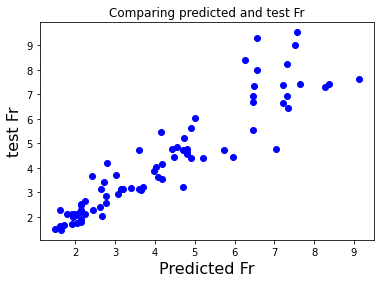

In [ ]:
plt.scatter(y_pred_decisiontree,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
r2_score(y_test, y_pred_decisiontree)

0.8511222730014125

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_decisiontree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_decisiontree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_decisiontree)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_decisiontree)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_decisiontree)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_decisiontree)))

MAE: 0.5817564382307693
MSE: 0.6814278243281028
RMSE: 0.8254864168041185
R2: 0.8254864168041185
BIAS: 0.8254864168041185
IQRREST: 0.8254864168041185


RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
y_pred_RandomForest=rf.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_RandomForest.reshape(len(y_pred_RandomForest),1), y_test.reshape(len(y_test),1)),1))

[[3.8150524  3.14228028]
 [2.41762566 2.49363017]
 [6.08689687 4.75130321]
 [1.49238754 1.49352266]
 [4.54479714 4.7773898 ]
 [5.05693444 4.79036455]
 [5.56015304 5.56149608]
 [1.81630731 1.67197665]
 [5.17421877 4.63192837]
 [2.39611252 2.65536838]
 [8.15091758 9.00581672]
 [7.50988731 9.52460319]
 [2.92142032 2.59197995]
 [7.61871681 7.99582739]
 [6.41785631 8.2377919 ]
 [2.03259079 1.93279402]
 [6.58925702 7.43718076]
 [1.87109434 2.12129361]
 [4.34299259 4.39746202]
 [3.14344457 3.13677147]
 [8.02495277 7.4230884 ]
 [1.88761872 1.7406128 ]
 [3.63375269 3.17787053]
 [2.96510612 4.20103057]
 [5.81188818 4.44151703]
 [2.90910098 3.12162504]
 [3.37699818 3.11217441]
 [1.88802812 1.79277628]
 [2.59166312 2.38926536]
 [6.66105314 6.92898385]
 [2.44112043 2.53462135]
 [5.4276635  6.03745556]
 [7.68800734 7.33978691]
 [2.06137993 2.20733863]
 [6.13651815 5.23817607]
 [4.04790404 4.72191306]
 [6.98945133 7.38126211]
 [3.7285881  3.2045597 ]
 [7.23866856 6.42001097]
 [7.49915079 7.61114509]


In [ ]:
r2_score(y_test, y_pred_RandomForest)

0.8894285873449279

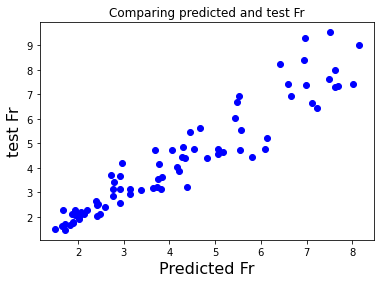

In [ ]:
plt.scatter(y_pred_RandomForest,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_RandomForest))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_RandomForest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RandomForest)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RandomForest)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RandomForest)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RandomForest)))

MAE: 0.5140722038102323
MSE: 0.5060961009912887
RMSE: 0.7114043161179785
R2: 0.7114043161179785
BIAS: 0.7114043161179785
IQRREST: 0.7114043161179785


Extra tree regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
reg_extratree= ExtraTreesRegressor(n_estimators=100, random_state=0)
reg_extratree.fit(X_train, y_train)

ExtraTreesRegressor(random_state=0)

In [ ]:
y_pred_extratree = reg_extratree.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_extratree.reshape(len(y_pred_extratree),1), y_test.reshape(len(y_test),1)),1))

[[3.94116416 3.14228028]
 [2.41316436 2.49363017]
 [6.48630491 4.75130321]
 [1.49836271 1.49352266]
 [4.69623694 4.7773898 ]
 [5.01770295 4.79036455]
 [6.16693792 5.56149608]
 [1.75192404 1.67197665]
 [4.94026917 4.63192837]
 [3.37140525 2.65536838]
 [8.74190495 9.00581672]
 [8.26084863 9.52460319]
 [2.93268704 2.59197995]
 [8.80504252 7.99582739]
 [6.79151015 8.2377919 ]
 [2.02774979 1.93279402]
 [6.88793056 7.43718076]
 [1.8766289  2.12129361]
 [4.52571405 4.39746202]
 [3.1102982  3.13677147]
 [8.05673084 7.4230884 ]
 [1.89445081 1.7406128 ]
 [3.39237525 3.17787053]
 [2.97321716 4.20103057]
 [5.67109678 4.44151703]
 [2.99939776 3.12162504]
 [3.75684058 3.11217441]
 [1.90179068 1.79277628]
 [2.86550915 2.38926536]
 [6.80237865 6.92898385]
 [2.47036831 2.53462135]
 [6.40338572 6.03745556]
 [6.89364771 7.33978691]
 [2.12120179 2.20733863]
 [5.90633034 5.23817607]
 [3.95693615 4.72191306]
 [6.92905501 7.38126211]
 [3.88238528 3.2045597 ]
 [7.14607982 6.42001097]
 [7.91528877 7.61114509]


In [ ]:
r2_score(y_test, y_pred_extratree)

0.9039486809125428

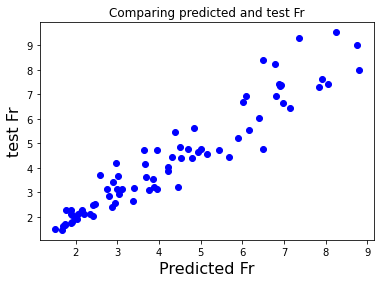

In [ ]:
plt.scatter(y_pred_extratree,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_extratree))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_extratree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_extratree)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_extratree)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_extratree)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_extratree)))

MAE: 0.49185224884961626
MSE: 0.4396362216776141
RMSE: 0.6630506931431519
R2: 0.6630506931431519
BIAS: 0.6630506931431519
IQRREST: 0.6630506931431519


support vector regression

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X1 = sc_X.fit_transform(X)
# y1 = sc_y.fit_transform(y)

In [ ]:

from sklearn.svm import SVR

In [ ]:
reg_supportvector = SVR(kernel='rbf')
reg_supportvector.fit(X_train,y_train)

SVR()

In [ ]:
y_pred_supportvector = reg_supportvector.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_supportvector.reshape(len(y_pred_supportvector),1), y_test.reshape(len(y_test),1)),1))

[[3.59757315 3.14228028]
 [2.29841768 2.49363017]
 [5.03185855 4.75130321]
 [1.29504049 1.49352266]
 [4.42587613 4.7773898 ]
 [5.09834211 4.79036455]
 [5.35645133 5.56149608]
 [2.20858099 1.67197665]
 [5.0507653  4.63192837]
 [2.65853868 2.65536838]
 [8.05168791 9.00581672]
 [5.7728048  9.52460319]
 [2.78098918 2.59197995]
 [6.71795553 7.99582739]
 [5.15160358 8.2377919 ]
 [2.03521372 1.93279402]
 [5.31117185 7.43718076]
 [1.85132771 2.12129361]
 [4.3815762  4.39746202]
 [3.16894144 3.13677147]
 [8.94245307 7.4230884 ]
 [1.96100644 1.7406128 ]
 [3.37745649 3.17787053]
 [3.75088012 4.20103057]
 [5.50335379 4.44151703]
 [2.99698763 3.12162504]
 [4.1433741  3.11217441]
 [1.78914811 1.79277628]
 [2.85692572 2.38926536]
 [5.10132379 6.92898385]
 [2.43733135 2.53462135]
 [4.95281689 6.03745556]
 [7.38261522 7.33978691]
 [2.33143828 2.20733863]
 [4.76668516 5.23817607]
 [3.8307235  4.72191306]
 [6.00786137 7.38126211]
 [3.66825129 3.2045597 ]
 [6.32698686 6.42001097]
 [6.79273477 7.61114509]


In [ ]:
r2_score(y_test, y_pred_supportvector)

0.7872466920019351

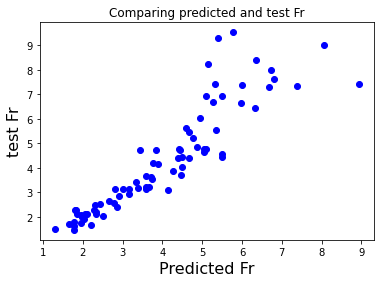

In [ ]:
plt.scatter(y_pred_supportvector,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_supportvector))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_supportvector))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_supportvector)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_supportvector)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_supportvector)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_supportvector)))

MAE: 0.6081094687961345
MSE: 0.9737925659565153
RMSE: 0.9868092855037975
R2: 0.9868092855037975
BIAS: 0.9868092855037975
IQRREST: 0.9868092855037975


Ada boost Regressor


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
reg_adaboost = AdaBoostRegressor(random_state=0, n_estimators=100)
reg_adaboost.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
y_pred_adaboost = reg_adaboost.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_adaboost.reshape(len(y_pred_adaboost),1), y_test.reshape(len(y_test),1)),1))

[[3.50196999 3.14228028]
 [2.39381657 2.49363017]
 [5.3508403  4.75130321]
 [2.10311743 1.49352266]
 [4.95166864 4.7773898 ]
 [5.70478652 4.79036455]
 [5.24882924 5.56149608]
 [2.39496926 1.67197665]
 [5.70478652 4.63192837]
 [3.23760719 2.65536838]
 [8.6104954  9.00581672]
 [7.35280295 9.52460319]
 [3.18227535 2.59197995]
 [7.49419254 7.99582739]
 [6.46968809 8.2377919 ]
 [2.39496926 1.93279402]
 [6.39634353 7.43718076]
 [2.27375788 2.12129361]
 [4.89452221 4.39746202]
 [3.23624143 3.13677147]
 [8.735295   7.4230884 ]
 [2.14372043 1.7406128 ]
 [3.29853116 3.17787053]
 [3.50345331 4.20103057]
 [6.33399936 4.44151703]
 [3.26542114 3.12162504]
 [4.68246868 3.11217441]
 [2.39381657 1.79277628]
 [3.26542114 2.38926536]
 [6.46968809 6.92898385]
 [2.58447038 2.53462135]
 [5.50789019 6.03745556]
 [6.36393528 7.33978691]
 [2.16883369 2.20733863]
 [6.03011101 5.23817607]
 [3.58983678 4.72191306]
 [6.68319475 7.38126211]
 [3.50345331 3.2045597 ]
 [6.71879545 6.42001097]
 [7.0989061  7.61114509]


In [ ]:
r2_score(y_test, y_pred_adaboost)

0.8519560685203044

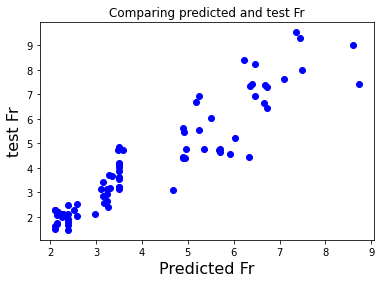

In [ ]:
plt.scatter(y_pred_adaboost,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_adaboost))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_adaboost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_adaboost)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_adaboost)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_adaboost)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_adaboost)))

MAE: 0.6367950761168979
MSE: 0.6776114612103448
RMSE: 0.823171586736535
R2: 0.823171586736535
BIAS: 0.823171586736535
IQRREST: 0.823171586736535


PLS regrression

In [ ]:
from sklearn.cross_decomposition import PLSRegression
reg_pls = PLSRegression(n_components=2)
reg_pls.fit(X_train, y_train)

PLSRegression()

In [ ]:
y_pred_pls = reg_pls.predict(X_test)

In [ ]:
print(np.concatenate((y_pred_pls.reshape(len(y_pred_pls),1), y_test.reshape(len(y_test),1)),1))

[[4.17147571 3.14228028]
 [2.59231244 2.49363017]
 [4.60391142 4.75130321]
 [0.03066323 1.49352266]
 [4.37885981 4.7773898 ]
 [4.95077356 4.79036455]
 [5.04663941 5.56149608]
 [1.67277521 1.67197665]
 [4.94400454 4.63192837]
 [4.46002823 2.65536838]
 [8.5927599  9.00581672]
 [5.12825092 9.52460319]
 [3.66940181 2.59197995]
 [5.88716128 7.99582739]
 [4.60159797 8.2377919 ]
 [2.80387382 1.93279402]
 [5.42838345 7.43718076]
 [1.56203073 2.12129361]
 [4.34020987 4.39746202]
 [4.29167606 3.13677147]
 [8.04249523 7.4230884 ]
 [0.68873246 1.7406128 ]
 [3.8006133  3.17787053]
 [3.88579758 4.20103057]
 [5.44281683 4.44151703]
 [3.40508457 3.12162504]
 [4.12287329 3.11217441]
 [1.67770285 1.79277628]
 [4.32427622 2.38926536]
 [4.58591475 6.92898385]
 [2.79568485 2.53462135]
 [4.84258199 6.03745556]
 [6.32506037 7.33978691]
 [1.50603764 2.20733863]
 [4.79778652 5.23817607]
 [4.23191943 4.72191306]
 [5.9014921  7.38126211]
 [4.15063374 3.2045597 ]
 [6.44449947 6.42001097]
 [6.78940623 7.61114509]


In [ ]:
r2_score(y_test, y_pred_pls)

0.6266747666542232

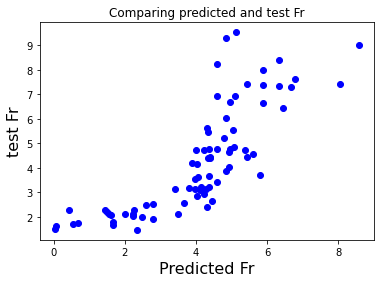

In [ ]:
plt.scatter(y_pred_pls,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_pls))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_pls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pls)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pls)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pls)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pls)))

MAE: 0.973674700148691
MSE: 1.7087458725643199
RMSE: 1.307190067497577
R2: 1.307190067497577
BIAS: 1.307190067497577
IQRREST: 1.307190067497577


Stacking Regressor

In [ ]:
# from sklearn.ensemble import StackingRegressor
# reg_stack=StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42)
# reg_sta.fit(X_train, y_train)

Grid search CV Regressor

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBR=GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
y_pred_gscv= grid_GBR.predict(X_test)

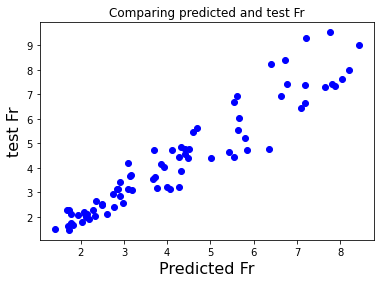

In [ ]:
plt.scatter(y_pred_gscv,y_test,color = 'blue')
plt.title('Comparing predicted and test Fr')
plt.xlabel('Predicted Fr',size=16)
plt.ylabel('test Fr',size=16,)
plt.show()

In [ ]:
print(np.concatenate((y_pred_gscv.reshape(len(y_pred_gscv),1), y_test.reshape(len(y_test),1)),1))

[[4.05975871 3.14228028]
 [2.4826946  2.49363017]
 [6.36153292 4.75130321]
 [1.40133624 1.49352266]
 [4.41727843 4.7773898 ]
 [4.50468386 4.79036455]
 [5.63932578 5.56149608]
 [1.82552109 1.67197665]
 [5.44104742 4.63192837]
 [2.35734537 2.65536838]
 [8.43993389 9.00581672]
 [7.76546131 9.52460319]
 [2.96821271 2.59197995]
 [8.21028548 7.99582739]
 [6.39101602 8.2377919 ]
 [2.2009875  1.93279402]
 [6.76360995 7.43718076]
 [1.77426092 2.12129361]
 [4.47101825 4.39746202]
 [2.83632897 3.13677147]
 [7.80828834 7.4230884 ]
 [1.77870975 1.7406128 ]
 [3.75687582 3.17787053]
 [3.09704976 4.20103057]
 [5.53574783 4.44151703]
 [3.09429858 3.12162504]
 [3.18396926 3.11217441]
 [2.0230883  1.79277628]
 [2.76856784 2.38926536]
 [6.62820915 6.92898385]
 [2.48736304 2.53462135]
 [5.65680428 6.03745556]
 [7.89209223 7.33978691]
 [2.08201718 2.20733863]
 [5.79074675 5.23817607]
 [4.10743543 4.72191306]
 [7.17711119 7.38126211]
 [3.98892309 3.2045597 ]
 [7.10130647 6.42001097]
 [8.04070661 7.61114509]


In [ ]:
r2_score(y_test, y_pred_gscv)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gscv))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gscv))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gscv)))
print('R2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gscv)))
print('BIAS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gscv)))
print('IQRREST:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gscv)))

MAE: 0.49996940306524706
MSE: 0.46775794605422094
RMSE: 0.6839283193831214
R2: 0.6839283193831214
BIAS: 0.6839283193831214
IQRREST: 0.6839283193831214
